# Explore here

Paso 1: Cargamos datos y exploracion inicial

In [6]:
import pandas as pd

# Cargar el CSV con separador correcto
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Crear columna 'label' a partir de 'quality'
def quality_to_label(q):
    if q <= 4:
        return 0  # Baja calidad
    elif q <= 6:
        return 1  # Calidad media
    else:
        return 2  # Alta calidad

df['label'] = df['quality'].apply(quality_to_label)

# Verificación rápida
print(df.head())
print(df.info())
print(df['label'].value_counts())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  label  
0      9.4        5      1  
1      9.8        5      1  

Paso 2: Separacion de datos y division del dataset

In [7]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns='label')
y = df['label']

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Paso 3: Escalamos datos

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Paso 4: Entrenamos modelo KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelo con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.94375
Confusion Matrix:
 [[  5   8   0]
 [  0 263   1]
 [  0   9  34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.94      1.00      0.97       264
           2       0.97      0.79      0.87        43

    accuracy                           0.94       320
   macro avg       0.97      0.72      0.80       320
weighted avg       0.95      0.94      0.94       320



La clase 0 (baja calidad) tiene solo 13 muestras en test y un recall bajo (0.38), es decir, muchos vinos de baja calidad no se detectan correctamente.

La clase 1 (calidad media) domina el dataset y tiene un recall casi perfecto (1.00).

La clase 2 (alta calidad) tiene buen desempeño, aunque con un recall un poco más bajo (0.79).

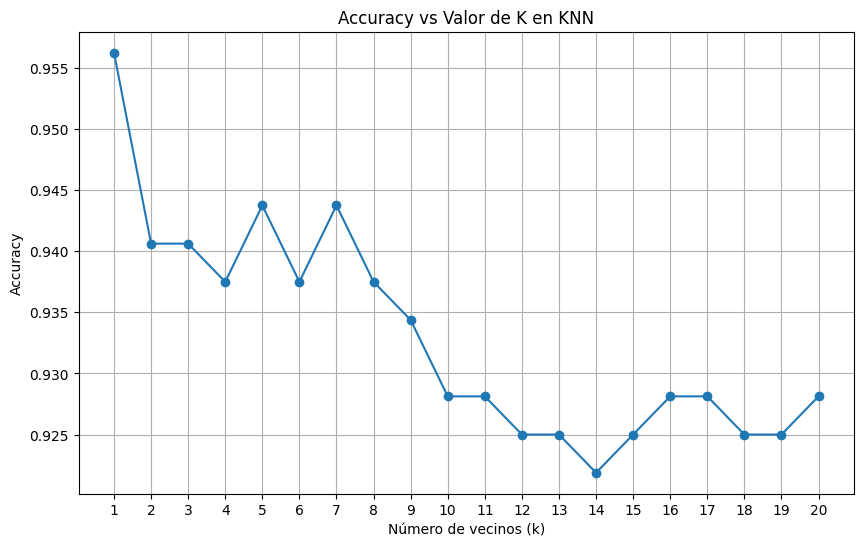

Mejor valor de k: 1 con accuracy: 0.9563


In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []

# Probar k del 1 al 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Graficar accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title('Accuracy vs Valor de K en KNN')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Mejor valor de k
best_k = accuracies.index(max(accuracies)) + 1
print(f"Mejor valor de k: {best_k} con accuracy: {max(accuracies):.4f}")


TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(Ellipsis, dtype=object)` instead.

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 11 features, but StandardScaler is expecting 12 features as input.